# Bennet Juhls (bjuhls@awi.de)
2021-02-07

# imports

In [54]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

from shapely.geometry.polygon import LinearRing
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from pyproj import Proj, transform

import json

import numpy as np
from skimage.draw import polygon as skpolygon

from scipy.stats import linregress

def find_nearest(lons,lats,xlon,xlat):
    dist=( (lats-xlat)**2 +(lons-xlon)**2 )
    sidx=np.unravel_index(dist.argmin(),dist.shape) 
    return sidx,dist[sidx[0],sidx[1]]

def use_polygon(lons,lats,polygon):
    '''
    lons: 2d field of longitudes (e.g. from satellite swath or np.meshgrid(lon,lat))
    lats: 2d field of latitudes  (see above)
    poly: array [[lon0,lat0],[lon1,lat1],...], at least three corner points
    '''
    polg=[]
    for p in polygon:
        polg.append(find_nearest(lons,lats,p[0],p[1])[0])
    
    polg=np.array(polg)
    mask = np.zeros(lons.shape, dtype=np.uint8)
    r,c = polg[:,0], polg[:,1]
    rr, cc = skpolygon(r, c)
    mask[rr, cc] = 1
    return mask.astype(bool)

Path_data = "/all_mounts/masp26/SMOS_artic/BennetProjects/ArcticOM/_data/masp17/CCI_Permafrost/ActiveLayerThawDepths/"

In [2]:
INFILE = "ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2016-fv02.0.nc" # replace with your file

nc_data = nc.Dataset(os.path.join(Path_data, INFILE))
nc_time_var = nc_data.variables['time']
nc_time_var.ncattrs()

cal = nc_time_var.getncattr('calendar')
date_units = nc_time_var.getncattr('units')
dtime = nc.num2date(nc_time_var[:],date_units,calendar=cal, only_use_cftime_datetimes=False)

print(nc_data.variables)

OrderedDict([('polar_stereographic', <class 'netCDF4._netCDF4.Variable'>
int32 polar_stereographic()
    grid_mapping_name: polar_stereographic
    straight_vertical_longitude_from_pole: 0.0
    false_easting: 0.0
    false_northing: 0.0
    latitude_of_projection_origin: 90.0
    standard_parallel: 71.0
    longitude_of_prime_meridian: 0.0
    semi_major_axis: 6378137.0
    inverse_flattening: 298.257223563
    crs_wkt: PROJCS["WGS 84 / Arctic Polar Stereographic",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Polar_Stereographic"],PARAMETER["latitude_of_origin",71],PARAMETER["central_meridian",0],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["X",EAST],AXIS["Y",NORTH],AUTHORITY["EP

In [3]:
ALT = nc_data.variables['ALT'][0][:10000,0:10000]
lat_var = nc_data.variables['y'][:10000]
lon_var = nc_data.variables['x'][:10000]

# Masks River catchments

# Simplified catchment geoms

In [28]:
pathCatchments = "/all_mounts/masp17/bjuhls/bjuhls_massp17/LenaLaptevSea/vectordata/ArcticRiverCatchments/LargeArcticRIvers_simplified/"

Kolyma = "Kolyma.json"
Yukon = "Yukon.json"
Mackenzie = "Mackenzie.json"
Ob = "Ob.json"
Yenisei = "Yenisei_2.json"
Lena = "Lena.json"

with open(os.path.join(pathCatchments, Kolyma)) as f:
    data = json.load(f)   
for feature in data['features']:
    Kolyma_coords = feature['geometry']['coordinates'][0]

with open(os.path.join(pathCatchments, Yukon)) as f:
    data = json.load(f)   
for feature in data['features']:
    Yukon_coords = feature['geometry']['coordinates'][0]
    
with open(os.path.join(pathCatchments, Mackenzie)) as f:
    data = json.load(f)   
for feature in data['features']:
    Mackenzie_coords = feature['geometry']['coordinates'][0]
    
with open(os.path.join(pathCatchments, Ob)) as f:
    data = json.load(f)   
for feature in data['features']:
    Ob_coords = feature['geometry']['coordinates'][0]
    
with open(os.path.join(pathCatchments, Yenisei)) as f:
    data = json.load(f)   
for feature in data['features']:
    Yenisei_coords = feature['geometry']['coordinates'][0]
    
with open(os.path.join(pathCatchments, Lena)) as f:
    data = json.load(f)   
for feature in data['features']:
    Lena_coords = feature['geometry']['coordinates'][0]
    
inProj = Proj(init='epsg:3995')
outProj = Proj(init='epsg:4326')
x1,y1 = lon_var, lat_var
lon_var_4326, lat_var_4326 = transform(inProj,outProj,x1,y1)

#lon,lat = np.meshgrid(x1,y1)

#Mask_Kolyma = use_polygon(lon, lat,Kolyma_coords)
#Mask_Yukon = use_polygon(lon, lat,Yukon_coords[0])
#Mask_Mackenzie = use_polygon(lon, lat,Mackenzie_coords)
#Mask_Ob = use_polygon(lon, lat,Ob_coords)
#Mask_Yenisei = use_polygon(lon, lat,Yenisei_coords[0])
#Mask_Lena = use_polygon(lon, lat,Lena_coords)#

# One example

## Rough subsets of catchments

In [5]:

inProj = Proj(init='epsg:4326')
outProj = Proj(init='epsg:3995')
Kolyma_coord_3995 = []
for i, e in enumerate(Kolyma_coords):
    x1,y1 = e[0], e[1]
    coord_t = transform(inProj,outProj,x1,y1) 
    Kolyma_coord_3995.append(coord_t)
    
### define subset box
LAT = [min(Kolyma_coord_3995, key=lambda x: x[1]),max(Kolyma_coord_3995, key=lambda x: x[1])]
LON = [min(Kolyma_coord_3995, key=lambda x: x[0]),max(Kolyma_coord_3995, key=lambda x: x[0])]


### reproject subset box coords
inProj = Proj(init='epsg:4326')
outProj = Proj(init='epsg:3995')
x1_min,y1_min = LON[0][0], LAT[0][1]
x2_min,y2_min = transform(inProj,outProj,x1_min,y1_min)
x1_max,y1_max = LON[1][0], LAT[1][1]
x2_max,y2_max = transform(inProj,outProj,x1_max,y1_max)

lat_min_index = np.argmin(np.abs(lat_var - y1_min))
lat_max_index = np.argmin(np.abs(lat_var - y1_max))

lon_min_index = np.argmin(np.abs(lon_var - x1_min))
lon_max_index = np.argmin(np.abs(lon_var - x1_max))

print(lat_min_index,lat_max_index)
print(lon_min_index,lon_max_index)

print(lat_var[lat_min_index],lat_var[lat_max_index])
print(lon_var[lon_min_index],lon_var[lon_max_index])

2205 1298
7028 8563
2071686.0146265966 2912135.2824830646
400848.32170145866 1823218.3615688002


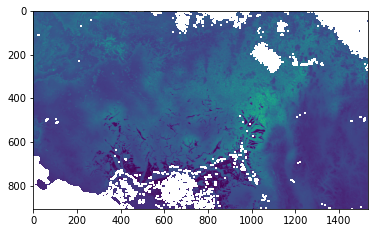

In [7]:
ALT_Kolyma_r = ALT[lat_max_index:lat_min_index,lon_min_index:lon_max_index]

Lon_Kolyma_r = lon_var[lon_min_index:lon_max_index] 
Lat_Kolyma_r = lat_var[lat_max_index:lat_min_index]

Lon_Kolyma_r_4326 = lon_var_4326[lon_min_index:lon_max_index] 
Lat_Kolyma_r_4326 = lat_var_4326[lat_max_index:lat_min_index]

plt.imshow(ALT_Kolyma_r)

In [12]:
lon,lat = np.meshgrid(Lon_Kolyma_r,Lat_Kolyma_r)
Kolyma_extrac_3995 = use_polygon(lon, lat, Kolyma_coord_3995)

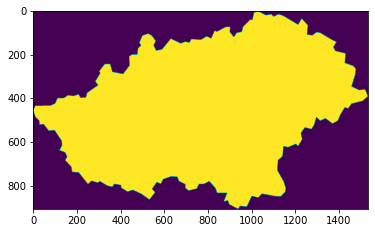

In [13]:
plt.imshow(Kolyma_extrac_3995)

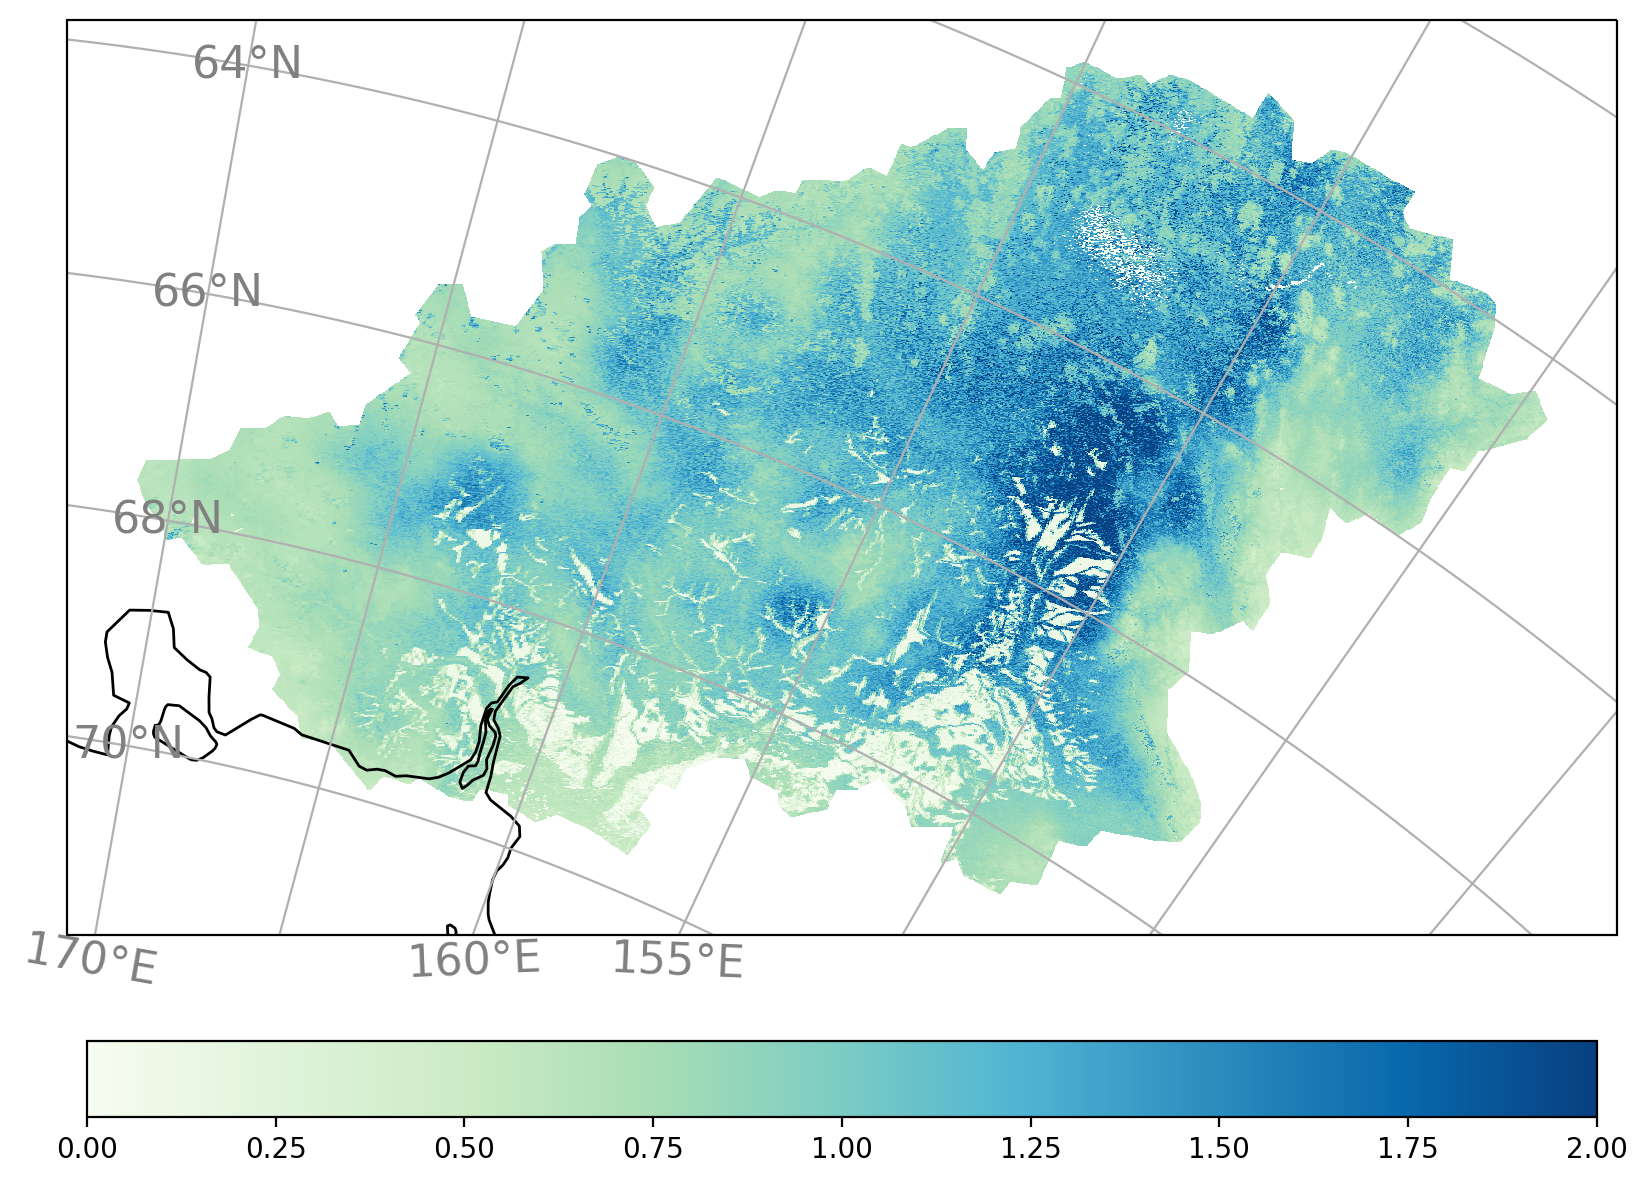

<Figure size 432x288 with 0 Axes>

In [17]:

land_resolution = '50m'

fig1 = plt.figure(figsize=(10, 10), dpi=200)
m = plt.axes(projection=ccrs.NorthPolarStereo())
f1 = plt.pcolormesh(lon,lat, np.where(Kolyma_extrac_3995, ALT_Kolyma_r, np.nan), shading='flat', 
                    vmin=-0, vmax=2, cmap=plt.cm.GnBu)


#f1 = plt.contourf(lon, lat, ALT_Kolyma_r, shading='flat', 
#                    cmap=plt.cm.viridis)

m.coastlines(resolution=land_resolution, color='black', linewidth=1)

g1 = m.gridlines(draw_labels = True)
g1.xlabels_top = False
g1.xlabel_style = {'size': 16, 'color': 'gray'}
g1.ylabel_style = {'size': 16, 'color': 'gray'}
cbar = plt.colorbar(f1, orientation="horizontal", fraction=0.05, pad=0.07) 

#cbar.ax.set_xticklabels(['0.01','0.1','0.5','1','3','10','50'], fontsize=20) 
#cbar.set_label('Chlorophyll, mg.m$^{-3}$', fontsize=20)
#plt.title('OLCI [CHL_NN] mg.m$^{-3}$', fontsize=20);

plt.show()
plt.clf()

# Iterating through years and extract ROI

## Kolyma

In [23]:
inProj = Proj(init='epsg:4326')
outProj = Proj(init='epsg:3995')
Kolyma_coord_3995 = []
for i, e in enumerate(Kolyma_coords):
    x1,y1 = e[0], e[1]
    coord_t = transform(inProj,outProj,x1,y1) 
    Kolyma_coord_3995.append(coord_t)
    
### define subset box
LAT = [min(Kolyma_coord_3995, key=lambda x: x[1]),max(Kolyma_coord_3995, key=lambda x: x[1])]
LON = [min(Kolyma_coord_3995, key=lambda x: x[0]),max(Kolyma_coord_3995, key=lambda x: x[0])]

### reproject subset box coords
inProj = Proj(init='epsg:4326')
outProj = Proj(init='epsg:3995')
x1_min,y1_min = LON[0][0], LAT[0][1]
x2_min,y2_min = transform(inProj,outProj,x1_min,y1_min)
x1_max,y1_max = LON[1][0], LAT[1][1]
x2_max,y2_max = transform(inProj,outProj,x1_max,y1_max)

lat_min_index = np.argmin(np.abs(lat_var - y1_min))
lat_max_index = np.argmin(np.abs(lat_var - y1_max))

lon_min_index = np.argmin(np.abs(lon_var - x1_min))
lon_max_index = np.argmin(np.abs(lon_var - x1_max))

ALT_Kolyma_all = []
dtime_kolyma_all = []

for filename in os.listdir(Path_data):
    if filename.endswith(".nc"):
        print(filename)
        INFILE =  filename# replace with your file

        nc_data = nc.Dataset(os.path.join(Path_data, INFILE))
        nc_time_var = nc_data.variables['time']
        nc_time_var.ncattrs()

        cal = nc_time_var.getncattr('calendar')
        date_units = nc_time_var.getncattr('units')
        dtime = nc.num2date(nc_time_var[:],date_units,calendar=cal, only_use_cftime_datetimes=False)
        dtime_kolyma_all.append(dtime)
        
        ALT = nc_data.variables['ALT'][0][:10000,0:10000]
        lat_var = nc_data.variables['y'][:10000]
        lon_var = nc_data.variables['x'][:10000]
        #print("make subset")
        ALT_Kolyma_r = ALT[lat_max_index:lat_min_index,lon_min_index:lon_max_index]

        Lon_Kolyma_r = lon_var[lon_min_index:lon_max_index] 
        Lat_Kolyma_r = lat_var[lat_max_index:lat_min_index]
        
        lon,lat = np.meshgrid(Lon_Kolyma_r,Lat_Kolyma_r)
        #print("make mask")
        Kolyma_extrac_3995 = use_polygon(lon, lat, Kolyma_coord_3995)
        #print("make extract")
        ALT_Kolyma_all.append(np.nanmean(ALT_Kolyma_r[Kolyma_extrac_3995]))
        #print("done,.... next")
        nc_data.close()

ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2018-fv02.0.nc
make subset
make mask
make extract
done,.... next
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2017-fv02.0.nc
make subset
make mask
make extract
done,.... next
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2016-fv02.0.nc
make subset
make mask
make extract
done,.... next
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2015-fv02.0.nc
make subset
make mask
make extract
done,.... next
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2014-fv02.0.nc
make subset
make mask
make extract
done,.... next
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2013-fv02.0.nc
make subset
make mask
make extract
done,.... next
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2012-fv02.0.nc
make subset
make mask
make extract
done,.... next
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2011-fv02.0.nc
make subset
make mask
make extract
done,.... next
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2010-fv02.0.

## Lena

In [29]:
inProj = Proj(init='epsg:4326')
outProj = Proj(init='epsg:3995')
Lena_coord_3995 = []
for i, e in enumerate(Lena_coords):
    x1,y1 = e[0], e[1]
    coord_t = transform(inProj,outProj,x1,y1) 
    Lena_coord_3995.append(coord_t)
    
### define subset box
LAT = [min(Lena_coord_3995, key=lambda x: x[1]),max(Lena_coord_3995, key=lambda x: x[1])]
LON = [min(Lena_coord_3995, key=lambda x: x[0]),max(Lena_coord_3995, key=lambda x: x[0])]

### reproject subset box coords
inProj = Proj(init='epsg:4326')
outProj = Proj(init='epsg:3995')
x1_min,y1_min = LON[0][0], LAT[0][1]
x2_min,y2_min = transform(inProj,outProj,x1_min,y1_min)
x1_max,y1_max = LON[1][0], LAT[1][1]
x2_max,y2_max = transform(inProj,outProj,x1_max,y1_max)

lat_min_index = np.argmin(np.abs(lat_var - y1_min))
lat_max_index = np.argmin(np.abs(lat_var - y1_max))

lon_min_index = np.argmin(np.abs(lon_var - x1_min))
lon_max_index = np.argmin(np.abs(lon_var - x1_max))

ALT_Lena_all = []
dtime_Lena_all = []

for filename in os.listdir(Path_data):
    if filename.endswith(".nc"):
        print(filename)
        INFILE =  filename# replace with your file

        nc_data = nc.Dataset(os.path.join(Path_data, INFILE))
        nc_time_var = nc_data.variables['time']
        nc_time_var.ncattrs()

        cal = nc_time_var.getncattr('calendar')
        date_units = nc_time_var.getncattr('units')
        dtime = nc.num2date(nc_time_var[:],date_units,calendar=cal, only_use_cftime_datetimes=False)
        dtime_Lena_all.append(dtime)
        
        ALT = nc_data.variables['ALT'][0][:10000,0:10000]
        lat_var = nc_data.variables['y'][:10000]
        lon_var = nc_data.variables['x'][:10000]
        #print("make subset")
        ALT_Lena_r = ALT[lat_max_index:lat_min_index,lon_min_index:lon_max_index]

        Lon_Lena_r = lon_var[lon_min_index:lon_max_index] 
        Lat_Lena_r = lat_var[lat_max_index:lat_min_index]
        
        lon,lat = np.meshgrid(Lon_Lena_r,Lat_Lena_r)
        #print("make mask")
        Lena_extrac_3995 = use_polygon(lon, lat, Lena_coord_3995)
        #print("make extract")
        ALT_Lena_all.append(np.nanmean(ALT_Lena_r[Lena_extrac_3995]))
        #print("done,.... next")
        nc_data.close()

ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2018-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2017-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2016-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2015-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2014-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2013-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2012-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2011-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2010-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2009-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2008-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2007-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2006-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2005-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2004-fv02.

## Yukon

In [32]:
inProj = Proj(init='epsg:4326')
outProj = Proj(init='epsg:3995')
Yukon_coord_3995 = []
for i, e in enumerate(Yukon_coords):
    x1,y1 = e[0], e[1]
    coord_t = transform(inProj,outProj,x1,y1) 
    Yukon_coord_3995.append(coord_t)
    
### define subset box
LAT = [min(Yukon_coord_3995, key=lambda x: x[1]),max(Yukon_coord_3995, key=lambda x: x[1])]
LON = [min(Yukon_coord_3995, key=lambda x: x[0]),max(Yukon_coord_3995, key=lambda x: x[0])]

### reproject subset box coords
inProj = Proj(init='epsg:4326')
outProj = Proj(init='epsg:3995')
x1_min,y1_min = LON[0][0], LAT[0][1]
x2_min,y2_min = transform(inProj,outProj,x1_min,y1_min)
x1_max,y1_max = LON[1][0], LAT[1][1]
x2_max,y2_max = transform(inProj,outProj,x1_max,y1_max)

lat_min_index = np.argmin(np.abs(lat_var - y1_min))
lat_max_index = np.argmin(np.abs(lat_var - y1_max))

lon_min_index = np.argmin(np.abs(lon_var - x1_min))
lon_max_index = np.argmin(np.abs(lon_var - x1_max))

ALT_Yukon_all = []
dtime_Yukon_all = []

for filename in os.listdir(Path_data):
    if filename.endswith(".nc"):
        print(filename)
        INFILE =  filename# replace with your file

        nc_data = nc.Dataset(os.path.join(Path_data, INFILE))
        nc_time_var = nc_data.variables['time']
        nc_time_var.ncattrs()

        cal = nc_time_var.getncattr('calendar')
        date_units = nc_time_var.getncattr('units')
        dtime = nc.num2date(nc_time_var[:],date_units,calendar=cal, only_use_cftime_datetimes=False)
        dtime_Yukon_all.append(dtime)
        
        ALT = nc_data.variables['ALT'][0][:10000,0:10000]
        lat_var = nc_data.variables['y'][:10000]
        lon_var = nc_data.variables['x'][:10000]
        #print("make subset")
        ALT_Yukon_r = ALT[lat_max_index:lat_min_index,lon_min_index:lon_max_index]

        Lon_Yukon_r = lon_var[lon_min_index:lon_max_index] 
        Lat_Yukon_r = lat_var[lat_max_index:lat_min_index]
        
        lon,lat = np.meshgrid(Lon_Yukon_r,Lat_Yukon_r)
        #print("make mask")
        Yukon_extrac_3995 = use_polygon(lon, lat, Yukon_coord_3995)
        #print("make extract")
        ALT_Yukon_all.append(np.nanmean(ALT_Yukon_r[Yukon_extrac_3995]))
        #print("done,.... next")
        nc_data.close()

ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2018-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2017-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2016-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2015-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2014-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2013-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2012-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2011-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2010-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2009-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2008-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2007-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2006-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2005-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2004-fv02.

## Mackenzie

In [33]:
inProj = Proj(init='epsg:4326')
outProj = Proj(init='epsg:3995')
Mackenzie_coord_3995 = []
for i, e in enumerate(Mackenzie_coords):
    x1,y1 = e[0], e[1]
    coord_t = transform(inProj,outProj,x1,y1) 
    Mackenzie_coord_3995.append(coord_t)
    
### define subset box
LAT = [min(Mackenzie_coord_3995, key=lambda x: x[1]),max(Mackenzie_coord_3995, key=lambda x: x[1])]
LON = [min(Mackenzie_coord_3995, key=lambda x: x[0]),max(Mackenzie_coord_3995, key=lambda x: x[0])]

### reproject subset box coords
inProj = Proj(init='epsg:4326')
outProj = Proj(init='epsg:3995')
x1_min,y1_min = LON[0][0], LAT[0][1]
x2_min,y2_min = transform(inProj,outProj,x1_min,y1_min)
x1_max,y1_max = LON[1][0], LAT[1][1]
x2_max,y2_max = transform(inProj,outProj,x1_max,y1_max)

lat_min_index = np.argmin(np.abs(lat_var - y1_min))
lat_max_index = np.argmin(np.abs(lat_var - y1_max))

lon_min_index = np.argmin(np.abs(lon_var - x1_min))
lon_max_index = np.argmin(np.abs(lon_var - x1_max))

ALT_Mackenzie_all = []
dtime_Mackenzie_all = []

for filename in os.listdir(Path_data):
    if filename.endswith(".nc"):
        print(filename)
        INFILE =  filename# replace with your file

        nc_data = nc.Dataset(os.path.join(Path_data, INFILE))
        nc_time_var = nc_data.variables['time']
        nc_time_var.ncattrs()

        cal = nc_time_var.getncattr('calendar')
        date_units = nc_time_var.getncattr('units')
        dtime = nc.num2date(nc_time_var[:],date_units,calendar=cal, only_use_cftime_datetimes=False)
        dtime_Mackenzie_all.append(dtime)
        
        ALT = nc_data.variables['ALT'][0][:10000,0:10000]
        lat_var = nc_data.variables['y'][:10000]
        lon_var = nc_data.variables['x'][:10000]
        #print("make subset")
        ALT_Mackenzie_r = ALT[lat_max_index:lat_min_index,lon_min_index:lon_max_index]

        Lon_Mackenzie_r = lon_var[lon_min_index:lon_max_index] 
        Lat_Mackenzie_r = lat_var[lat_max_index:lat_min_index]
        
        lon,lat = np.meshgrid(Lon_Mackenzie_r,Lat_Mackenzie_r)
        #print("make mask")
        Mackenzie_extrac_3995 = use_polygon(lon, lat, Mackenzie_coord_3995)
        #print("make extract")
        ALT_Mackenzie_all.append(np.nanmean(ALT_Mackenzie_r[Mackenzie_extrac_3995]))
        #print("done,.... next")
        nc_data.close()

ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2018-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2017-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2016-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2015-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2014-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2013-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2012-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2011-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2010-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2009-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2008-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2007-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2006-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2005-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2004-fv02.

## Ob

In [34]:
inProj = Proj(init='epsg:4326')
outProj = Proj(init='epsg:3995')
Ob_coord_3995 = []
for i, e in enumerate(Ob_coords):
    x1,y1 = e[0], e[1]
    coord_t = transform(inProj,outProj,x1,y1) 
    Ob_coord_3995.append(coord_t)
    
### define subset box
LAT = [min(Ob_coord_3995, key=lambda x: x[1]),max(Ob_coord_3995, key=lambda x: x[1])]
LON = [min(Ob_coord_3995, key=lambda x: x[0]),max(Ob_coord_3995, key=lambda x: x[0])]

### reproject subset box coords
inProj = Proj(init='epsg:4326')
outProj = Proj(init='epsg:3995')
x1_min,y1_min = LON[0][0], LAT[0][1]
x2_min,y2_min = transform(inProj,outProj,x1_min,y1_min)
x1_max,y1_max = LON[1][0], LAT[1][1]
x2_max,y2_max = transform(inProj,outProj,x1_max,y1_max)

lat_min_index = np.argmin(np.abs(lat_var - y1_min))
lat_max_index = np.argmin(np.abs(lat_var - y1_max))

lon_min_index = np.argmin(np.abs(lon_var - x1_min))
lon_max_index = np.argmin(np.abs(lon_var - x1_max))

ALT_Ob_all = []
dtime_Ob_all = []

for filename in os.listdir(Path_data):
    if filename.endswith(".nc"):
        print(filename)
        INFILE =  filename# replace with your file

        nc_data = nc.Dataset(os.path.join(Path_data, INFILE))
        nc_time_var = nc_data.variables['time']
        nc_time_var.ncattrs()

        cal = nc_time_var.getncattr('calendar')
        date_units = nc_time_var.getncattr('units')
        dtime = nc.num2date(nc_time_var[:],date_units,calendar=cal, only_use_cftime_datetimes=False)
        dtime_Ob_all.append(dtime)
        
        ALT = nc_data.variables['ALT'][0][:10000,0:10000]
        lat_var = nc_data.variables['y'][:10000]
        lon_var = nc_data.variables['x'][:10000]
        #print("make subset")
        ALT_Ob_r = ALT[lat_max_index:lat_min_index,lon_min_index:lon_max_index]

        Lon_Ob_r = lon_var[lon_min_index:lon_max_index] 
        Lat_Ob_r = lat_var[lat_max_index:lat_min_index]
        
        lon,lat = np.meshgrid(Lon_Ob_r,Lat_Ob_r)
        #print("make mask")
        Ob_extrac_3995 = use_polygon(lon, lat, Ob_coord_3995)
        #print("make extract")
        ALT_Ob_all.append(np.nanmean(ALT_Ob_r[Ob_extrac_3995]))
        #print("done,.... next")
        nc_data.close()

ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2018-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2017-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2016-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2015-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2014-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2013-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2012-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2011-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2010-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2009-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2008-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2007-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2006-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2005-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2004-fv02.

## Yenisei

In [35]:
inProj = Proj(init='epsg:4326')
outProj = Proj(init='epsg:3995')
Yenisei_coord_3995 = []
for i, e in enumerate(Yenisei_coords):
    x1,y1 = e[0], e[1]
    coord_t = transform(inProj,outProj,x1,y1) 
    Yenisei_coord_3995.append(coord_t)
    
### define subset box
LAT = [min(Yenisei_coord_3995, key=lambda x: x[1]),max(Yenisei_coord_3995, key=lambda x: x[1])]
LON = [min(Yenisei_coord_3995, key=lambda x: x[0]),max(Yenisei_coord_3995, key=lambda x: x[0])]

### reproject subset box coords
inProj = Proj(init='epsg:4326')
outProj = Proj(init='epsg:3995')
x1_min,y1_min = LON[0][0], LAT[0][1]
x2_min,y2_min = transform(inProj,outProj,x1_min,y1_min)
x1_max,y1_max = LON[1][0], LAT[1][1]
x2_max,y2_max = transform(inProj,outProj,x1_max,y1_max)

lat_min_index = np.argmin(np.abs(lat_var - y1_min))
lat_max_index = np.argmin(np.abs(lat_var - y1_max))

lon_min_index = np.argmin(np.abs(lon_var - x1_min))
lon_max_index = np.argmin(np.abs(lon_var - x1_max))

ALT_Yenisei_all = []
dtime_Yenisei_all = []

for filename in os.listdir(Path_data):
    if filename.endswith(".nc"):
        print(filename)
        INFILE =  filename# replace with your file

        nc_data = nc.Dataset(os.path.join(Path_data, INFILE))
        nc_time_var = nc_data.variables['time']
        nc_time_var.ncattrs()

        cal = nc_time_var.getncattr('calendar')
        date_units = nc_time_var.getncattr('units')
        dtime = nc.num2date(nc_time_var[:],date_units,calendar=cal, only_use_cftime_datetimes=False)
        dtime_Yenisei_all.append(dtime)
        
        ALT = nc_data.variables['ALT'][0][:10000,0:10000]
        lat_var = nc_data.variables['y'][:10000]
        lon_var = nc_data.variables['x'][:10000]
        #print("make subset")
        ALT_Yenisei_r = ALT[lat_max_index:lat_min_index,lon_min_index:lon_max_index]

        Lon_Yenisei_r = lon_var[lon_min_index:lon_max_index] 
        Lat_Yenisei_r = lat_var[lat_max_index:lat_min_index]
        
        lon,lat = np.meshgrid(Lon_Yenisei_r,Lat_Yenisei_r)
        #print("make mask")
        Yenisei_extrac_3995 = use_polygon(lon, lat, Yenisei_coord_3995)
        #print("make extract")
        ALT_Yenisei_all.append(np.nanmean(ALT_Yenisei_r[Yenisei_extrac_3995]))
        #print("done,.... next")
        nc_data.close()

ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2018-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2017-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2016-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2015-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2014-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2013-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2012-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2011-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2010-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2009-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2008-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2007-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2006-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2005-fv02.0.nc
ESACCI-PERMAFROST-L4-ALT-MODISLST_CRYOGRID-AREA4_PP-2004-fv02.

# Plot mean ALT for 6 rivers

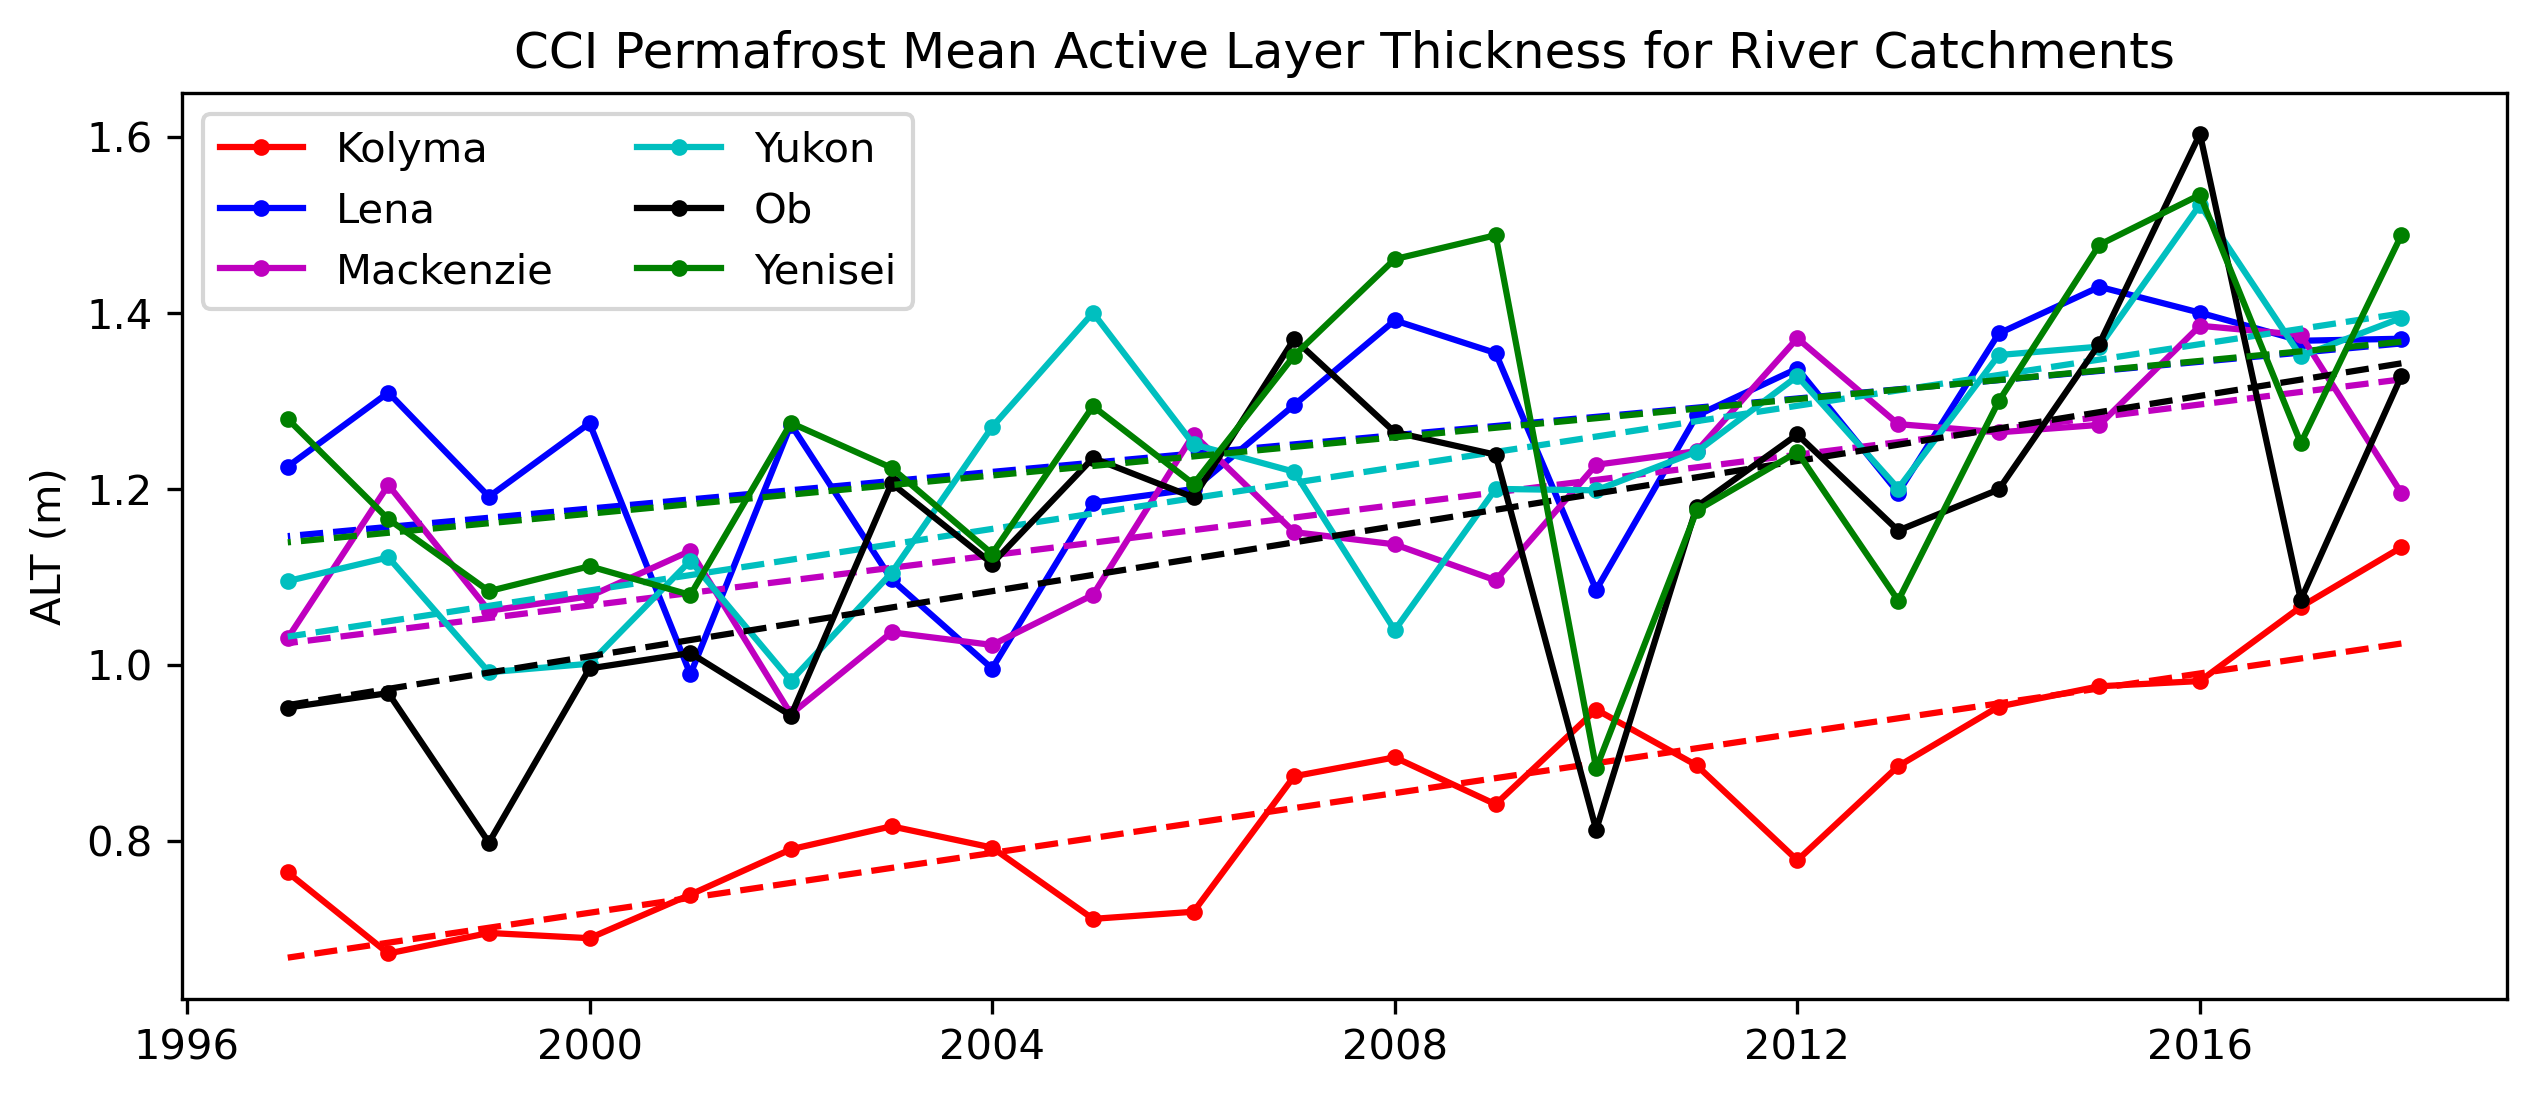

In [45]:
poly_fit_Kolyma = np.polyfit(np.arange(0, len(dtime_kolyma_all)), ALT_Kolyma_all, 1)
fit_fn_Kolyma = np.poly1d(poly_fit_Kolyma)

poly_fit_Lena = np.polyfit(np.arange(0, len(dtime_Lena_all)), ALT_Lena_all, 1)
fit_fn_Lena = np.poly1d(poly_fit_Lena)

poly_fit_Yukon = np.polyfit(np.arange(0, len(dtime_Yukon_all)), ALT_Yukon_all, 1)
fit_fn_Yukon = np.poly1d(poly_fit_Yukon)

poly_fit_Ob = np.polyfit(np.arange(0, len(dtime_Ob_all)), ALT_Ob_all, 1)
fit_fn_Ob = np.poly1d(poly_fit_Ob)

poly_fit_Yenisei = np.polyfit(np.arange(0, len(dtime_Yenisei_all)), ALT_Yenisei_all, 1)
fit_fn_Yenisei = np.poly1d(poly_fit_Yenisei)

poly_fit_Mackenzie = np.polyfit(np.arange(0, len(dtime_Mackenzie_all)), ALT_Mackenzie_all, 1)
fit_fn_Mackenzie = np.poly1d(poly_fit_Mackenzie)

f, ((ax1 )) = plt.subplots(1, 1,figsize=(10,4), dpi=300,sharex =True)

plt.title("CCI Permafrost Mean Active Layer Thickness for River Catchments")
ax1.plot(dtime_kolyma_all,ALT_Kolyma_all, "r.-", label="Kolyma")
ax1.plot(dtime_kolyma_all,fit_fn_Kolyma(np.arange(0, len(dtime_kolyma_all))), "r--")

ax1.plot(dtime_kolyma_all,ALT_Lena_all, "b.-", label="Lena")
ax1.plot(dtime_kolyma_all,fit_fn_Lena(np.arange(0, len(dtime_kolyma_all))), "b--")

ax1.plot(dtime_kolyma_all,ALT_Mackenzie_all, "m.-", label="Mackenzie")
ax1.plot(dtime_kolyma_all,fit_fn_Mackenzie(np.arange(0, len(dtime_kolyma_all))), "m--")

ax1.plot(dtime_kolyma_all,ALT_Yukon_all, "c.-", label="Yukon")
ax1.plot(dtime_kolyma_all,fit_fn_Yukon(np.arange(0, len(dtime_Yukon_all))), "c--")

ax1.plot(dtime_kolyma_all,ALT_Ob_all, "k.-", label="Ob")
ax1.plot(dtime_kolyma_all,fit_fn_Ob(np.arange(0, len(dtime_Ob_all))), "k--")

ax1.plot(dtime_kolyma_all,ALT_Yenisei_all, "g.-", label="Yenisei")
ax1.plot(dtime_kolyma_all,fit_fn_Yenisei(np.arange(0, len(dtime_Yenisei_all))), "g--")

plt.legend(loc=2, ncol=2)
plt.ylabel("ALT (m)")
plt.show()

In [57]:
print("Slope Ob: " + str(linregress(np.arange(0, len(dtime_Ob_all)), ALT_Ob_all)[0]))
print("Slope Yenisei: " + str(linregress(np.arange(0, len(dtime_Ob_all)), ALT_Yenisei_all)[0]))
print("Slope Lena: " + str(linregress(np.arange(0, len(dtime_Ob_all)), ALT_Lena_all)[0]))
print("Slope Kolyma: " + str(linregress(np.arange(0, len(dtime_Ob_all)), ALT_Kolyma_all)[0]))
print("Slope Yukon: " + str(linregress(np.arange(0, len(dtime_Ob_all)), ALT_Yukon_all)[0]))
print("Slope Mackenzie: " + str(linregress(np.arange(0, len(dtime_Ob_all)), ALT_Mackenzie_all)[0]))

Slope Ob: -0.018508580918070852
Slope Yenisei: -0.01085779879428875
Slope Lena: -0.010433935204301817
Slope Kolyma: -0.017010534071121478
Slope Yukon: -0.01750330273024644
Slope Mackenzie: -0.014283701189954055
